# __Lock in Amplifier Using EXPEYES__

### Importing the Libraries

In [246]:
import eyes17.eyes
import numpy as np
import math as m
import time
p=eyes17.eyes.open()

### Defining the Frequencies and Amplitude of the Input Signal

In [247]:
f=1000 #Hz
amp = 2 # 1=> 1V 2=> 3V
N_sample = 8197
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

### Setting the Input Signal as a sine wave of frequency 1000Hz

In [248]:
p.set_sine_amp(amp)
p.set_sine(f)
p.configure_trigger(0,'A1',-0.5)
t,v = p.capture1('A1',N_sample,t_gap) # Captured input signal
print(t)
print(v)
print(len(t))

[0.00000000e+00 1.56250000e-02 3.12500000e-02 ... 1.28031250e+02
 1.28046875e+02 1.28062500e+02]
[0.04566153 0.3680708  0.65819094 ... 0.65819094 0.9482654  1.20607103]
8197


### Generating the Reference Signals (Sine and Cosine)

In [249]:
V_sin_ref=[]
V_cos_ref=[]
t_ref = []
for i in range(N_sample):
    V_sin_ref.append(amp*m.sin(2*m.pi*f*i*t_gap*10**-6))
    V_cos_ref.append(amp*m.cos(2*m.pi*f*i*t_gap*10**-6))
    t_ref.append(i*t_gap)

print(len(V_sin_ref))    


8197


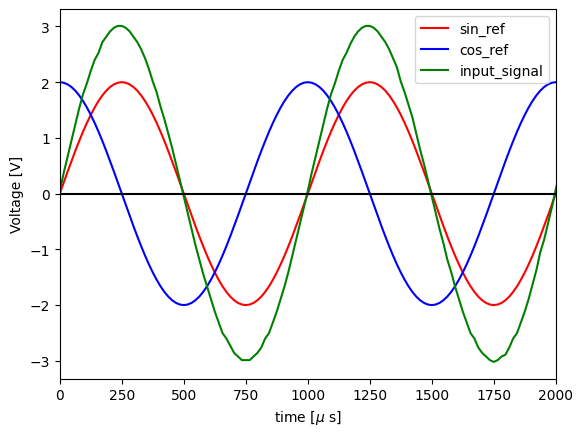

In [250]:
import matplotlib.pyplot as plt
plt.plot(t*1000,v,color='green',label='input_signal')
plt.plot(t_ref,V_sin_ref,color='red',label='sin_ref')
plt.plot(t_ref,V_cos_ref,color='blue',label='cos_ref')
plt.xlabel(r'time [$\mu $ s]')
plt.ylabel('Voltage [V]')
plt.xlim(0,2000)
plt.legend()
plt.axhline(y=0, c="black")
plt.show()